In [2]:
!pip install librosa

     |████████████████████████████████| 1.6MB 311kB/s eta 0:00:01
     |████████████████████████████████| 327kB 3.9MB/s eta 0:00:01
  Stored in directory: /home/archibold/.cache/pip/wheels/07/36/47/a9a4d151332cbdaec564500af9704a0ad862cf554dcf4bfda0
  Stored in directory: /home/archibold/.cache/pip/wheels/b9/64/09/0b6417df9d8ba8bc61a7d2553c5cebd714ec169644c88fc012
  Stored in directory: /home/archibold/.cache/pip/wheels/fa/c1/56/e0e12c6f7f3d2cdea9712b35136a2d40a7817c6210ec096485
Successfully built librosa audioread resampy


In [113]:
import numpy as np
import pandas as pd
import 

In [ ]:
import inflect
en = inflect.engine()
en.number_to_words(1)

In [162]:
label_words = []
tr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
tr.index("a") + 1

for item in cls_true:
    label_words.append(en.number_to_words(int(item)))
    
    pass




def convert(word):
    term = [tr.index(i) for i in word]
    return term

label_tokens = []

for word in label_words:
    label_tokens.append(convert(word))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [135]:


def wav2mfcc(file_path, augment = False, max_pad_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=8000, duration = 1.024)
    
    if augment == True:
        bins_per_octave = 12
        pitch_pm = 4
        pitch_change =  pitch_pm * 2*(np.random.uniform())   
        wave = librosa.effects.pitch_shift(wave, 
                                          8000, n_steps=pitch_change, 
                                          bins_per_octave=bins_per_octave)
        
        speed_change = np.random.uniform(low=0.9,high=1.1)
        wave = librosa.effects.time_stretch(wave, speed_change)
        wave = wave[:8192]

    duration = wave.shape[0]/sr
    speed_change = 2.0* duration/1.024
    wave = librosa.effects.time_stretch(wave, speed_change)
    wave = wave[:4096]
    
    wave = librosa.util.normalize(wave)
    mfcc = librosa.feature.mfcc(wave, sr=sr, n_mfcc=40, hop_length=int(0.048*sr), n_fft=int(0.096*sr))
    mfcc -= (np.mean(mfcc, axis=0) + 1e-8)
    #print("shape=",mfcc.shape[1], wave.shape[0])
    pad_width = max_pad_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    #mfcc = mfcc[2:24,:]
    return mfcc, duration, sr

def get_data(dir = '', augment= False):
    labels = []
    mfccs = []
    durations = []
    sampling_rates = []
    filenames = []

    for f in tqdm(os.listdir(dir)):
        if f.endswith('.wav'):
            mfcc, duration, sr = wav2mfcc(dir + "/" + f, augment)
            mfccs.append(mfcc)
            durations.append(duration)
            sampling_rates.append(sr)
            # List of labels
            label = f.split('_')[0]
            #convert the number to characters
            label = en.number_to_words(int(label))
            
            label = convert(label)
            labels.append(label)
            filenames.append(dir + "/" + f)
    return filenames, np.asarray(mfccs), np.asarray(durations), np.asarray(sampling_rates),labels, labels


In [111]:
print(os.listdir("free-spoken-digit-dataset-master/recordings/"))

['3_theo_15.wav', '3_jackson_31.wav', '9_nicolas_2.wav', '3_jackson_29.wav', '5_nicolas_20.wav', '3_jackson_47.wav', '9_jackson_30.wav', '0_nicolas_44.wav', '5_theo_28.wav', '1_jackson_49.wav', '6_jackson_31.wav', '8_jackson_34.wav', '6_theo_49.wav', '0_theo_13.wav', '2_theo_10.wav', '3_jackson_49.wav', '8_nicolas_33.wav', '2_jackson_18.wav', '7_theo_24.wav', '7_jackson_23.wav', '7_theo_1.wav', '2_nicolas_11.wav', '0_jackson_41.wav', '7_theo_40.wav', '8_theo_49.wav', '3_theo_9.wav', '2_theo_33.wav', '6_jackson_20.wav', '4_nicolas_44.wav', '8_jackson_10.wav', '5_jackson_16.wav', '6_jackson_14.wav', '0_jackson_18.wav', '5_nicolas_3.wav', '0_theo_12.wav', '2_jackson_44.wav', '5_jackson_20.wav', '0_theo_3.wav', '7_theo_48.wav', '1_jackson_17.wav', '3_theo_33.wav', '9_nicolas_19.wav', '6_nicolas_22.wav', '6_nicolas_14.wav', '6_nicolas_43.wav', '0_theo_24.wav', '9_jackson_35.wav', '6_jackson_27.wav', '8_jackson_11.wav', '9_jackson_20.wav', '4_theo_8.wav', '9_theo_12.wav', '1_jackson_39.wav',

In [112]:
filenames, mfccs, durations, sampling_rates, labels, cls_true = get_data("free-spoken-digit-dataset-master/recordings/")

  0%|          | 0/1501 [00:00<?, ?it/s]

free-spoken-digit-dataset-master/recordings/


100%|██████████| 1501/1501 [00:16<00:00, 88.71it/s] 


In [114]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3, figsize=(15,15))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    max = np.max(images)
    min = np.min(images)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        #ax.imshow(images[i].reshape(img_shape), cmap='binary')
        im = librosa.display.specshow(images[i], ax=ax, vmin=min, vmax=max)

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

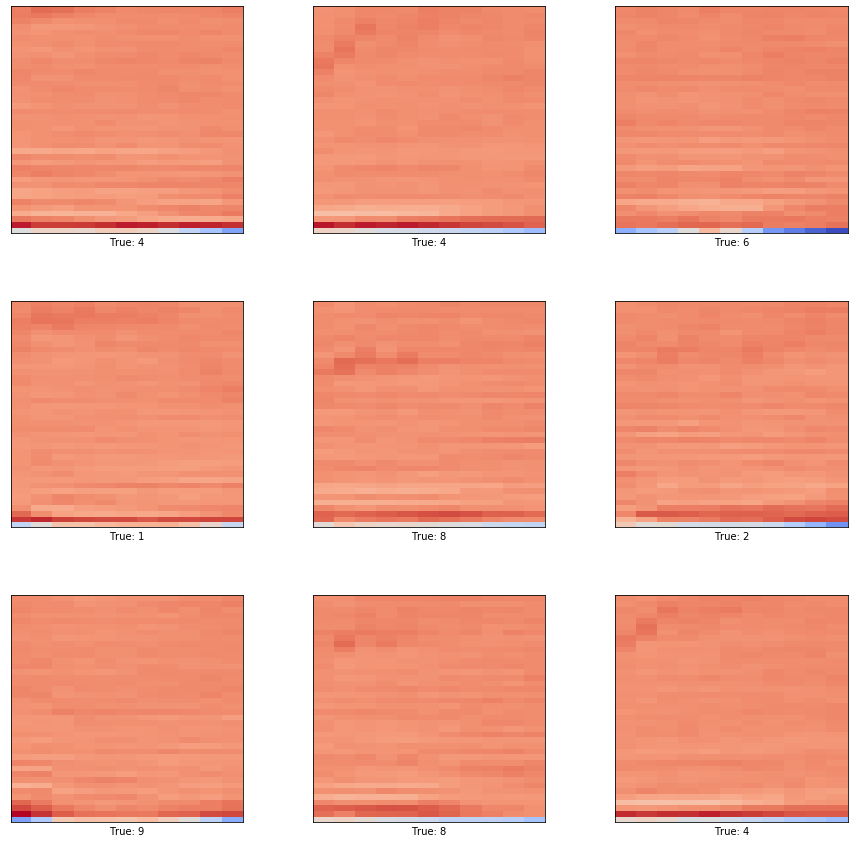

In [115]:
plot_images(mfccs[100:109], cls_true[100:109])

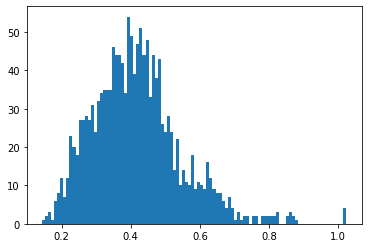

In [116]:
n, bins, patches = plt.hist(durations, bins=100)


'one'

In [122]:

tr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
tr.index("a") + 1

for item in cls_true:
    label_words.append(en.number_to_words(int(item)))
    
    pass




def convert(word):
    term = [tr.index(i) for i in word]
    return term

label_tokens = []

for word in label_words:
    label_tokens.append(convert(word))

In [125]:
print(label_words[:10])
print(cls_true[:10])

['three', 'three', 'nine', 'three', 'five', 'three', 'nine', 'zero', 'five', 'one']
['3', '3', '9', '3', '5', '3', '9', '0', '5', '1']


In [126]:
tr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
tr.index("a") + 1



def convert(word):
    term = [tr.index(i) for i in word]
    return term

In [127]:
label_tokens = []

for word in label_words:
    label_tokens.append(convert(word))

In [128]:
label_tokens

[[19, 7, 17, 4, 4],
 [19, 7, 17, 4, 4],
 [13, 8, 13, 4],
 [19, 7, 17, 4, 4],
 [5, 8, 21, 4],
 [19, 7, 17, 4, 4],
 [13, 8, 13, 4],
 [25, 4, 17, 14],
 [5, 8, 21, 4],
 [14, 13, 4],
 [18, 8, 23],
 [4, 8, 6, 7, 19],
 [18, 8, 23],
 [25, 4, 17, 14],
 [19, 22, 14],
 [19, 7, 17, 4, 4],
 [4, 8, 6, 7, 19],
 [19, 22, 14],
 [18, 4, 21, 4, 13],
 [18, 4, 21, 4, 13],
 [18, 4, 21, 4, 13],
 [19, 22, 14],
 [25, 4, 17, 14],
 [18, 4, 21, 4, 13],
 [4, 8, 6, 7, 19],
 [19, 7, 17, 4, 4],
 [19, 22, 14],
 [18, 8, 23],
 [5, 14, 20, 17],
 [4, 8, 6, 7, 19],
 [5, 8, 21, 4],
 [18, 8, 23],
 [25, 4, 17, 14],
 [5, 8, 21, 4],
 [25, 4, 17, 14],
 [19, 22, 14],
 [5, 8, 21, 4],
 [25, 4, 17, 14],
 [18, 4, 21, 4, 13],
 [14, 13, 4],
 [19, 7, 17, 4, 4],
 [13, 8, 13, 4],
 [18, 8, 23],
 [18, 8, 23],
 [18, 8, 23],
 [25, 4, 17, 14],
 [13, 8, 13, 4],
 [18, 8, 23],
 [4, 8, 6, 7, 19],
 [13, 8, 13, 4],
 [5, 14, 20, 17],
 [13, 8, 13, 4],
 [14, 13, 4],
 [14, 13, 4],
 [18, 4, 21, 4, 13],
 [18, 8, 23],
 [25, 4, 17, 14],
 [25, 4, 17, 14],
 [

In [160]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LSTM

#from ann_visualizer.visualize import ann_viz
def get_cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())

    model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(120, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

    return model

ValueError: Input 0 is incompatible with layer conv2d_16: expected ndim=4, found ndim=3

In [130]:
from sklearn.model_selection import train_test_split

In [158]:
def get_all():
    filenames, mfccs, durations, sampling_rates, labels, cls_true = get_data('free-spoken-digit-dataset-master/recordings/', augment = False)
    
    filenames_a, mfccs_a, durations_a, sampling_rates_a, labels_a, cls_true_a = get_data('free-spoken-digit-dataset-master/recordings/', augment = True)

    mfccs = np.append(mfccs, mfccs_a, axis=0)
    labels = np.append(labels, labels_a, axis =0)
    
    dim_1 = mfccs.shape[1]
    dim_2 = mfccs.shape[2]
    channels = 1
    classes = 1
    
    print("sampling rate (max) = ", np.max(sampling_rates))
    print("sampling rate (min) = ", np.min(sampling_rates))
    print("duration (max) = ", np.max(durations))
    print("duration (avg) = ", np.average(durations))
    print("duration (min) = ", np.min(durations))
    print("mffc matrix = ", mfccs.shape)

    X = mfccs
    X = X.reshape((mfccs.shape[0], dim_1, dim_2, channels))
    y = labels

    input_shape = (dim_1, dim_2, channels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    model = get_cnn_model(input_shape, classes)

    return X_train, X_test, y_train, y_test, model

In [156]:
X_train, X_test, y_train, y_test, cnn_model = get_all()

print(cnn_model.summary())

cnn_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)

  0%|          | 7/1501 [00:00<00:22, 67.85it/s]

free-spoken-digit-dataset-master/recordings/


  0%|          | 4/1501 [00:00<00:40, 36.94it/s]

free-spoken-digit-dataset-master/recordings/


100%|██████████| 1501/1501 [00:38<00:00, 39.13it/s]


sampling rate (max) =  8000
sampling rate (min) =  8000
duration (max) =  1.024
duration (avg) =  0.41654141666666666
duration (min) =  0.143625
mffc matrix =  (3000, 40, 11)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 37, 8, 32)         544       
_________________________________________________________________
batch_normalization_21 (Batc (None, 37, 8, 32)         128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 35, 6, 48)         13872     
_________________________________________________________________
batch_normalization_22 (Batc (None, 35, 6, 48)         192       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 4, 120)        51960     
_________________________________________________________________
batch_normalization_23 (Batc (Non

ValueError: You are passing a target array of shape (2400, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [144]:
# filenames, mfccs, durations, sampling_rates, labels, cls_true = get_data('free-spoken-digit-dataset-master/recordings/', augment = False)
# filenames_a, mfccs_a, durations_a, sampling_rates_a, labels_a, cls_true_a = get_data('free-spoken-digit-dataset-master/recordings/', augment = True)

# mfccs = np.append(mfccs, mfccs_a, axis=0)
# labels = np.append(labels, labels_a, axis =0)
    
# dim_1 = mfccs.shape[1]
# dim_2 = mfccs.shape[2]
# channels = 1
# classes = 5
    
# print("sampling rate (max) = ", np.max(sampling_rates))
# print("sampling rate (min) = ", np.min(sampling_rates))
# print("duration (max) = ", np.max(durations))
# print("duration (avg) = ", np.average(durations))
# print("duration (min) = ", np.min(durations))
# print("mffc matrix = ", mfccs.shape)

# X = mfccs
# X = X.reshape((mfccs.shape[0], dim_1, dim_2, channels))
# y = keras.preprocessing.sequence.pad_sequences(labels, maxlen=None, padding='post', truncating='post', value=0)

# input_shape = (dim_1, dim_2, channels)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# model = get_cnn_model(input_shape, classes)



  1%|          | 8/1501 [00:00<00:19, 74.78it/s]

free-spoken-digit-dataset-master/recordings/


  0%|          | 3/1501 [00:00<00:55, 26.94it/s]

free-spoken-digit-dataset-master/recordings/


100%|██████████| 1501/1501 [00:42<00:00, 35.30it/s]


sampling rate (max) =  8000
sampling rate (min) =  8000
duration (max) =  1.024
duration (avg) =  0.41654141666666666
duration (min) =  0.143625
mffc matrix =  (3000, 40, 11)


In [137]:
# X_train, X_test, y_train, y_test, cnn_model = get_all()


  1%|          | 8/1501 [00:00<00:19, 75.98it/s]

free-spoken-digit-dataset-master/recordings/


  0%|          | 0/1501 [00:00<?, ?it/s]

free-spoken-digit-dataset-master/recordings/


100%|██████████| 1501/1501 [00:37<00:00, 40.30it/s]
W1113 14:49:18.158602 140580651136832 deprecation_wrapper.py:119] From /home/archibold/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



sampling rate (max) =  8000
sampling rate (min) =  8000
duration (max) =  1.024
duration (avg) =  0.41654141666666666
duration (min) =  0.143625
mffc matrix =  (3000, 40, 11)


W1113 14:49:18.264307 140580651136832 deprecation_wrapper.py:119] From /home/archibold/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1113 14:49:18.287373 140580651136832 deprecation_wrapper.py:119] From /home/archibold/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1113 14:49:18.382703 140580651136832 deprecation_wrapper.py:119] From /home/archibold/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1113 14:49:18.383566 140580651136832 deprecation_wrapper.py:119] From /home/archibold/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.Confi

In [149]:
y_train.shape

(2400, 5)

In [145]:
model = get_cnn_model(input_shape, classes)
    
print(cnn_model.summary())

cnn_model.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 37, 8, 32)         544       
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 8, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 6, 48)         13872     
_________________________________________________________________
batch_normalization_2 (Batch (None, 35, 6, 48)         192       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 4, 120)        51960     
_________________________________________________________________
batch_normalization_3 (Batch (None, 33, 4, 120)        480       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 2, 120)        0         
__________

KeyboardInterrupt: 